In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Densely sampled smooth data

In [2]:
x=np.arange(-10,10,.1)
index_pos=np.where(x>0)
index_neg=np.where(x<=0)
H1=np.zeros(len(x))
H1[index_pos]=1
H2=np.zeros(len(x))
H2[index_neg]=1

alpha=10
beta=.4
gamma=-.2
# y=alpha*x*H1 + beta*x**2 + gamma*x**3*H2
#y=alpha*x + beta*x**2*H1 + gamma*x**3*H2
y = alpha * H1 + gamma * x * H2 + beta*x**2

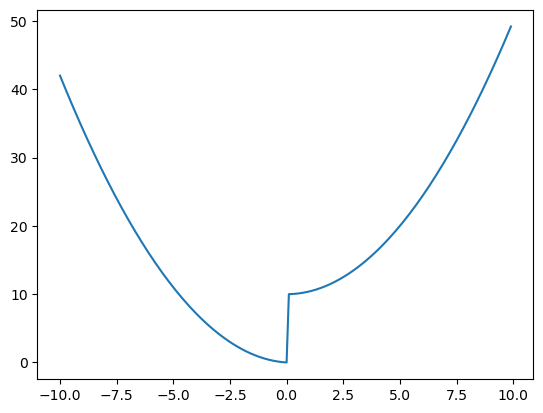

In [3]:
plt.plot(x,y)

## Train with entire data set

In [4]:
# train with entire data set
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x.reshape(-1,1),y)

RandomForestRegressor(n_estimators=10, random_state=0)

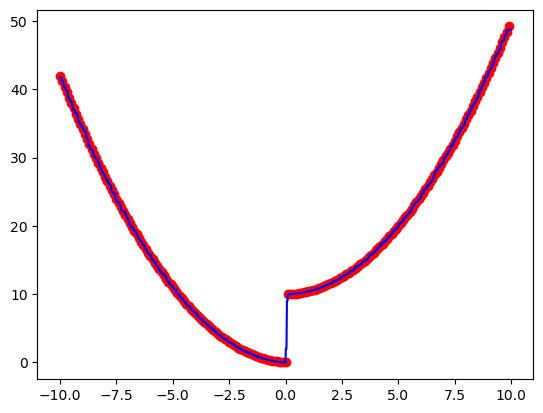

In [5]:
x_grid=np.arange(-10,10,.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')

## Split into training and test data

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x.reshape(-1,1),y,test_size=0.2,random_state=0)

In [7]:
# train with training data only
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train.reshape(-1,1),y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

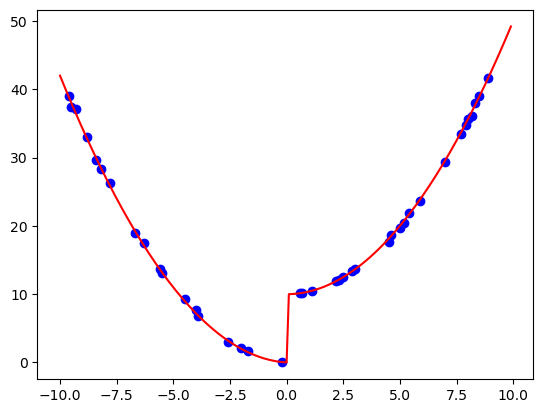

In [8]:
x_grid=np.arange(-10,10,.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.plot(x,y,color='red')
plt.scatter(X_test,regressor.predict(X_test),color='blue')

In [9]:
mse=mean_squared_error(y_test,regressor.predict(X_test))
mse2=mean_squared_error(y_train,regressor.predict(X_train))
mse,mse2

(0.08039340799999843, 0.08294391999999957)

In [21]:
mse=np.zeros(10)
mse2=np.zeros(10)
for i in range(1,11):
    regressor = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor.fit(X_train.reshape(-1,1),y_train)
    mse[i-1]=mean_squared_error(y_test,regressor.predict(X_test))
    mse2[i-1]=mean_squared_error(y_train,regressor.predict(X_train))

Text(0, 0.5, 'MSE')

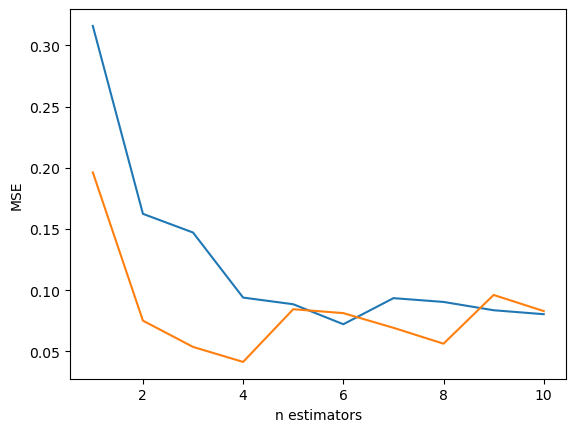

In [22]:
plt.plot(range(1,11),mse)
plt.plot(range(1,11),mse2)
plt.xlabel('n estimators')
plt.ylabel('MSE')

## What if you have only a few data?

In [45]:
###  use fewer data
x=np.arange(-10,10,1)
index_pos=np.where(x>0)
index_neg=np.where(x<=0)
H1=np.zeros(len(x))
H1[index_pos]=1
H2=np.zeros(len(x))
H2[index_neg]=1

alpha=10
beta=.4
gamma=-.2
# y=alpha*x*H1 + beta*x**2 + gamma*x**3*H2
#y=alpha*x + beta*x**2*H1 + gamma*x**3*H2
y = alpha * H1 + gamma * x * H2 + beta*x**2

In [46]:
# train with entire data set
  ## vary n_estimators
regressor = RandomForestRegressor(n_estimators=1,random_state=0)
regressor.fit(x.reshape(-1,1),y)

RandomForestRegressor(n_estimators=1, random_state=0)

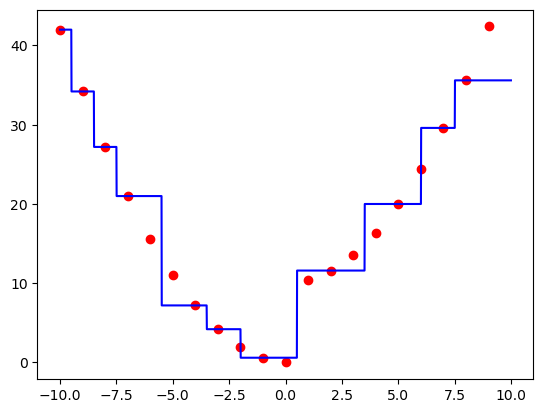

In [47]:
x_grid=np.arange(-10,10,.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')

## Noisy data

In [48]:
x=np.arange(-10,10,.1)
index_pos=np.where(x>0)
index_neg=np.where(x<=0)
H1=np.zeros(len(x))
H1[index_pos]=1
H2=np.zeros(len(x))
H2[index_neg]=1

y = alpha * H1 + gamma * x * H2 + beta*x**2
y = y + 5*np.random.random(len(x))

In [49]:
X_train,X_test,y_train,y_test = train_test_split(x.reshape(-1,1),y,test_size=0.2,random_state=0)

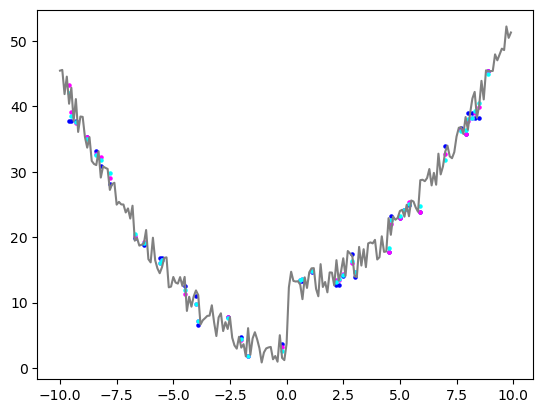

In [50]:
x_grid=np.arange(-10,10,.01)
x_grid=x_grid.reshape(len(x_grid),1)

regressor = RandomForestRegressor(n_estimators=1,random_state=0)
regressor.fit(X_train.reshape(-1,1),y_train)
plt.plot(x,y,color='gray')
plt.scatter(X_test,regressor.predict(X_test),s=5,color='blue')

regressor = RandomForestRegressor(n_estimators=5,random_state=0)
regressor.fit(X_train.reshape(-1,1),y_train)
plt.scatter(X_test,regressor.predict(X_test),s=5,color='magenta')

regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train.reshape(-1,1),y_train)
plt.scatter(X_test,regressor.predict(X_test),color='cyan',s=5)

In [51]:
n_estimators=40
mse=np.zeros(n_estimators)
mse2=np.zeros(n_estimators)
for i in range(1,n_estimators+1):
    regressor = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor.fit(X_train.reshape(-1,1),y_train)
    mse[i-1]=mean_squared_error(y_test,regressor.predict(X_test))
    mse2[i-1]=mean_squared_error(y_train,regressor.predict(X_train))

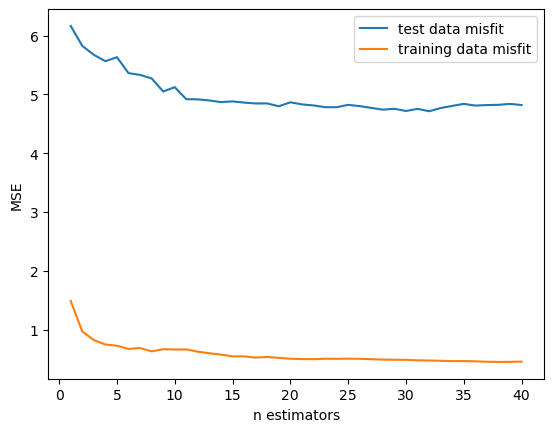

In [52]:
plt.plot(range(1,n_estimators+1),mse,label='test data misfit')
plt.plot(range(1,n_estimators+1),mse2,label='training data misfit')
plt.xlabel('n estimators')
plt.ylabel('MSE')
plt.legend()

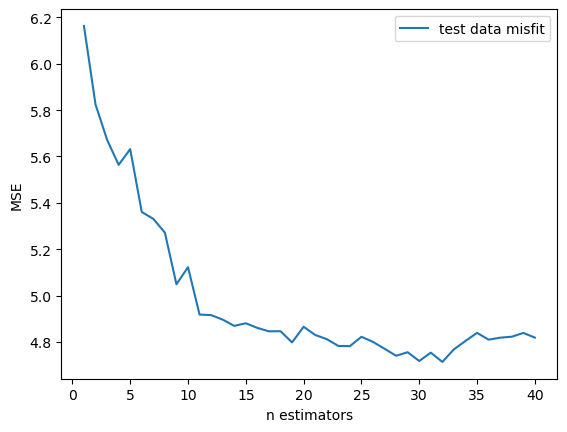

In [53]:
plt.plot(range(1,n_estimators+1),mse,label='test data misfit')
plt.xlabel('n estimators')
plt.ylabel('MSE')
plt.legend()